### TODOS
* Načtěte dataset do datového rámce 
* Vytvořte přínosné vizualizace 
* Vytvořte přínosnou kontingenční tabulku 
* Vytvořte přínosnou korelační matici 
* Extrahujte z textů pojmenované entity a uložte je pro budoucí zpracování 
* Extrahujte z textů zajímavá slovní spojení a uložte je pro budoucí zpracování 
* Extrahujte z textu sentiment v návaznosti na entity 
* Extrahujte z textu jazykový styl pisatele 
* Najděte nejpodobnější/nejodlišnější recenze pomocí vzdálenosti vektorů dokumentů 
* Natrénujte klasifikátor sentimentu 
* Natrénujte klasifikaci národnosti podle textu příspěvku 

Vytvoření složky pro model
Načtení datasetu do datového rámce pomocí pandas
Příprava dat
Analýza datasetu pomocí knihovny seaborn
Vyvážení dat
Rozdělení na trénovací a testovací data
Formátování dat pro klasifikační úlohu
Vytvoření klasifikátoru
Příprava várek pro trénink
Trénink klasifikátoru
Evaluace klasifikátoru
Byznys analýza dat pomocí vizualizace a kontingenčních tabulek

In [9]:
import pandas as pd
import spacy
import seaborn as sns
from pandas_profiling import ProfileReport

In [3]:
hotel = pd.read_csv("Hotel_Reviews.csv")

In [4]:
hotel.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [5]:
hotel.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts             float64
Total_Number_of_Reviews_Reviewer_Has_Given    float64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

In [6]:
hotel.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [13]:
profile = ProfileReport(hotel, minimal=False)
profile.to_file("report.html")

In [ ]:
nlp = spacy.load("en_core_web_md")
print(nlp)

/opt/venv/lib/python3.7/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_md' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.4). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


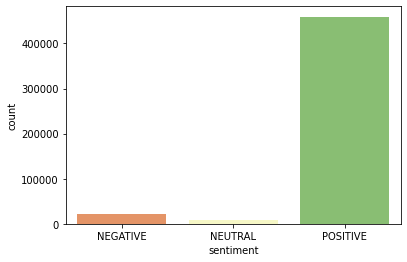

In [ ]:
hotel["sentiment"] = pd.cut(hotel["Reviewer_Score"], 
                   bins=[0,4.9,5,10], 
                   labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
sns.countplot(x="sentiment", data=hotel, palette="RdYlGn");

In [ ]:
indicies_to_drop = hotel[hotel.sentiment == "NEUTRAL"].index

In [ ]:
hotel = hotel.drop(indicies_to_drop)

hotel.groupby("sentiment").count()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
sentiment,,,,,,,,,,,,,,,,,
NEGATIVE,20933,20933,20933,20933,20933,20933,20933,20933,20933,20933,20933,20933,20933,20933,20933,20839,20839
NEUTRAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
POSITIVE,459357,459357,459357,459357,459357,459357,459357,459357,459357,459357,459357,459357,459357,459357,459357,456832,456832


CategoricalDtype(categories=['NEGATIVE', 'POSITIVE'], ordered=True)

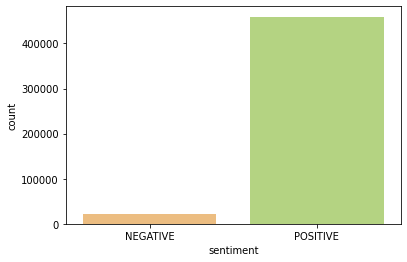

In [ ]:
hotel.sentiment = hotel.sentiment.cat.remove_unused_categories() #odstrani tu prazdnou neutral kategorii!
sns.countplot(x="sentiment", data=hotel, palette="RdYlGn")
hotel.sentiment.dtype

In [ ]:
hotel.groupby("sentiment")["Reviewer_Score"].count()

sentiment
NEGATIVE     20933
POSITIVE    459357
Name: Reviewer_Score, dtype: int64

In [ ]:
# vyvážení dat

In [ ]:
hotel_neg = hotel[hotel.sentiment=="NEGATIVE"]
hotel_pos = hotel[hotel.sentiment=="POSITIVE"]

In [ ]:
hotel_pos = hotel_pos.sample(500)